In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
f = "conditions.csv"
df = pd.read_csv(f, sep='|')
df.head()

,CONDITION_ID,NCT_ID,CONDITION
0,150,NCT00000262,Substance-Related Disorders
1,151,NCT00000263,Opioid-Related Disorders
2,152,NCT00000263,Substance-Related Disorders
3,153,NCT00000264,Opioid-Related Disorders
4,154,NCT00000264,Substance-Related Disorders


In [3]:
# Get unique conditions
df.CONDITION.unique()

array(['Substance-Related Disorders', 'Opioid-Related Disorders',
       'Cocaine-Related Disorders', ..., 'Isthmic Spondylolisthesis',
       'Recurrent Hernia of Anterior Abdominal Wall',
       'Burden of Surgical Disease in Western Kenya'], dtype=object)

In [4]:
# Count frequencies of conditions
df_cond_freq = df.groupby('CONDITION').count()
df_cond_freq

,CONDITION_ID,NCT_ID
CONDITION,,
'Appetite Regulation',1,1
'Grey Zone' Lymphoma,1,1
'In Situ Simulation',1,1
(Advanced) Coronary Heart Disease,1,1
(Atrial Fibrillation) or (Atrial Flutter),1,1
...,...,...
β-thalassemia,1,1
β-thalassemia Major,3,3
"λz,",1,1


In [5]:
# Get most common conditions, with over one thousand cases in terms of either CONDITION_ID or NCT_ID
number_of_cases = 1_000
cond_freq_filt = (df_cond_freq.CONDITION_ID > number_of_cases) | (df_cond_freq.NCT_ID > number_of_cases)
df_most_freq = df_cond_freq[cond_freq_filt]
df_most_freq

,CONDITION_ID,NCT_ID
CONDITION,,
Asthma,2259,2259
Atrial Fibrillation,1010,1010
Breast Cancer,4059,4059
Cancer,1496,1496
Cardiovascular Diseases,1264,1264
Colorectal Cancer,1490,1490
Coronary Artery Disease,1776,1776
Depression,1815,1815
Diabetes,1805,1805


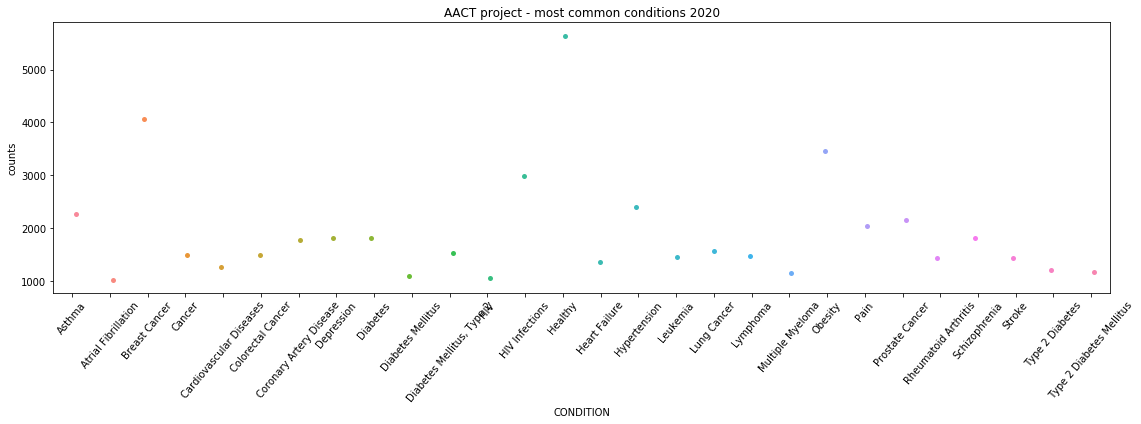

In [6]:
# Show the most common conditions
plt.figure(figsize=(16, 6))
ax = sns.stripplot(data=df_most_freq.reset_index(),
                 x="CONDITION",
                 y="CONDITION_ID"
                )
l = ax.set_xticklabels(ax.get_xticklabels(), rotation=50)
k = ax.set(ylabel='counts')
plt.title('AACT project - most common conditions 2020')
plt.tight_layout()
plt.savefig('most_common_conditions.png')